In [4]:
import pandas as pd
movies = pd.read_csv('Highest Holywood Grossing Movies.csv',index_col = 'Unnamed: 0')
movies.rename(columns = {'Release Date':'Date'}, inplace=True)
print(movies.head())

                                        Title  \
0  Star Wars: Episode VII - The Force Awakens   
1                           Avengers: Endgame   
2                                      Avatar   
3                               Black Panther   
4                      Avengers: Infinity War   

                                          Movie Info  \
0  As a new threat to the galaxy rises, Rey, a de...   
1  After the devastating events of Avengers: Infi...   
2  A paraplegic Marine dispatched to the moon Pan...   
3  T'Challa, heir to the hidden but advanced king...   
4  The Avengers and their allies must be willing ...   

                           Distributor               Date  \
0  Walt Disney Studios Motion Pictures  December 16, 2015   
1  Walt Disney Studios Motion Pictures     April 24, 2019   
2                Twentieth Century Fox  December 16, 2009   
3  Walt Disney Studios Motion Pictures                NaN   
4  Walt Disney Studios Motion Pictures                NaN   

 

In [6]:
#Sorting
total_gross = movies.sort_values("World Sales (in $)", ascending = False)
print(total_gross.head())

                                        Title  \
2                                      Avatar   
1                           Avengers: Endgame   
6                                     Titanic   
0  Star Wars: Episode VII - The Force Awakens   
4                      Avengers: Infinity War   

                                          Movie Info  \
2  A paraplegic Marine dispatched to the moon Pan...   
1  After the devastating events of Avengers: Infi...   
6  A seventeen-year-old aristocrat falls in love ...   
0  As a new threat to the galaxy rises, Rey, a de...   
4  The Avengers and their allies must be willing ...   

                           Distributor               Date  \
2                Twentieth Century Fox  December 16, 2009   
1  Walt Disney Studios Motion Pictures     April 24, 2019   
6                   Paramount Pictures  December 19, 1997   
0  Walt Disney Studios Motion Pictures  December 16, 2015   
4  Walt Disney Studios Motion Pictures                NaN   

 

In [8]:
#dropping columns
columns_to_drop = ['Movie Info']
print(movies.columns)
new_movies = movies.drop(columns=columns_to_drop)
print(new_movies.columns)
print(new_movies.head)

Index(['Title', 'Movie Info', 'Distributor', 'Date', 'Domestic Sales (in $)',
       'International Sales (in $)', 'World Sales (in $)', 'Genre',
       'Movie Runtime', 'License'],
      dtype='object')
Index(['Title', 'Distributor', 'Date', 'Domestic Sales (in $)',
       'International Sales (in $)', 'World Sales (in $)', 'Genre',
       'Movie Runtime', 'License'],
      dtype='object')
<bound method NDFrame.head of                                           Title  \
0    Star Wars: Episode VII - The Force Awakens   
1                             Avengers: Endgame   
2                                        Avatar   
3                                 Black Panther   
4                        Avengers: Infinity War   
..                                          ...   
913                                The Notebook   
914                   Jimmy Neutron: Boy Genius   
915                               Eat Pray Love   
916                 The Texas Chainsaw Massacre   
917            

In [9]:
# Group by Distributor; calc total world sales, rename columns, indexing
sales_by_dist = new_movies.groupby("Distributor",as_index=False)["World Sales (in $)"].sum().rename(columns={'Distributor':'Distributor','World Sales (in $)' : 'World Sales'})
sorted_sales_by_dist=sales_by_dist.sort_values("World Sales",ascending=False)
print(sorted_sales_by_dist)

                            Distributor  World Sales
32  Walt Disney Studios Motion Pictures  82372098598
33                         Warner Bros.  63597493931
27                Twentieth Century Fox  48588894179
31                   Universal Pictures  45602644818
23    Sony Pictures Entertainment (SPE)  37456488081
16                   Paramount Pictures  32443523480
4                            DreamWorks  10412975902
10                            Lionsgate   7498505934
13                      New Line Cinema   7066345995
5               DreamWorks Distribution   5814639953
11            Metro-Goldwyn-Mayer (MGM)   3717884355
24                 Summit Entertainment   2729159486
26                     TriStar Pictures   2483548026
12                              Miramax   2058591162
25                The Weinstein Company   1822188393
18                   Revolution Studios   1442436078
2                     Columbia Pictures   1374209626
3                       Dimension Films   1223

In [10]:
# Import requests package, online API
import requests

# Assign URL to variable: url
url = 'http://www.omdbapi.com/?apikey=72bc447a&t=avatar'

# Package the request, send the request and catch the response: r
r = requests.get(url)

# Decode the JSON data into a dictionary: json_data
json_data=r.json()

# Print each key-value pair in json_data
for k in json_data.keys():
    print(k + ': ', json_data[k])

Title:  Avatar
Year:  2009
Rated:  PG-13
Released:  18 Dec 2009
Runtime:  162 min
Genre:  Action, Adventure, Fantasy
Director:  James Cameron
Writer:  James Cameron
Actors:  Sam Worthington, Zoe Saldana, Sigourney Weaver
Plot:  A paraplegic Marine dispatched to the moon Pandora on a unique mission becomes torn between following his orders and protecting the world he feels is his home.
Language:  English, Spanish
Country:  United States
Awards:  Won 3 Oscars. 89 wins & 131 nominations total
Poster:  https://m.media-amazon.com/images/M/MV5BZDA0OGQxNTItMDZkMC00N2UyLTg3MzMtYTJmNjg3Nzk5MzRiXkEyXkFqcGdeQXVyMjUzOTY1NTc@._V1_SX300.jpg
Ratings:  [{'Source': 'Internet Movie Database', 'Value': '7.9/10'}, {'Source': 'Rotten Tomatoes', 'Value': '82%'}, {'Source': 'Metacritic', 'Value': '83/100'}]
Metascore:  83
imdbRating:  7.9
imdbVotes:  1,313,610
imdbID:  tt0499549
Type:  movie
DVD:  22 Apr 2010
BoxOffice:  $785,221,649
Production:  N/A
Website:  N/A
Response:  True


In [6]:
sales_by_genre = new_movies.groupby("Genre",as_index=False)["World Sales (in $)"].sum().rename(columns={'Genre':'Genre','World Sales (in $)' : 'World Sales'})
sorted_sales_by_genre=sales_by_genre.sort_values("World Sales",ascending=False)
print(sorted_sales_by_genre)

                                                 Genre  World Sales
52                   ['Action', 'Adventure', 'Sci-Fi']  41522408939
44        ['Action', 'Adventure', 'Fantasy', 'Sci-Fi']  16932858353
53                 ['Action', 'Adventure', 'Thriller']  13526614959
51       ['Action', 'Adventure', 'Sci-Fi', 'Thriller']  11286067658
135  ['Adventure', 'Animation', 'Comedy', 'Family',...   8712541892
..                                                 ...          ...
289                        ['Drama', 'Mystery', 'War']     92158064
151  ['Adventure', 'Animation', 'Family', 'Fantasy'...     87404651
207          ['Biography', 'Drama', 'Family', 'Music']     86086881
255                                  ['Comedy', 'War']     85297000
238                         ['Comedy', 'Drama', 'War']     81600000

[309 rows x 2 columns]


In [11]:
import pandas as pd
movie_stats = pd.read_csv("top-500-movies.csv")
movie_stats.rename(columns = {'title':'Title','release_date':'Release Date'}, inplace = True)
print(movie_stats.head)

<bound method NDFrame.head of      rank Release Date                                        Title  \
0       1   2019-04-23                            Avengers: Endgame   
1       2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2       3   2015-04-22                      Avengers: Age of Ultron   
3       4   2015-12-16         Star Wars Ep. VII: The Force Awakens   
4       5   2018-04-25                       Avengers: Infinity War   
..    ...          ...                                          ...   
495   496   2013-02-06                       A Good Day to Die Hard   
496   497   2004-04-09                                    The Alamo   
497   498   1995-12-22                             Cutthroat Island   
498   499   2013-12-19              The Secret Life of Walter Mitty   
499   500   2023-03-09                                           65   

                                                   url  production_cost  \
0           /movie/Avengers-Endgame-(2019)

In [21]:
movie_info = movie_stats.merge(new_movies,on=['Title']).rename(columns={'production_cost':'Cost','World Sales (in $)' : 'World Sales'})
print(movie_info)

     rank Release Date                                              Title  \
0       1   2019-04-23                                  Avengers: Endgame   
1       2   2011-05-20        Pirates of the Caribbean: On Stranger Tides   
2       3   2015-04-22                            Avengers: Age of Ultron   
3       5   2018-04-25                             Avengers: Infinity War   
4       7   2017-11-13                                     Justice League   
..    ...          ...                                                ...   
308   490   2015-01-29                       Kingsman: The Secret Service   
309   491   2001-12-19  The Lord of the Rings: The Fellowship of the Ring   
310   492   2001-07-18                                  Jurassic Park III   
311   493   2011-08-05                     Rise of the Planet of the Apes   
312   495   2004-10-22                                    The Incredibles   

                                                   url       Cost  \
0     

In [13]:
budget_by_dist = movie_info.groupby("Distributor",as_index=False)["production_cost"].sum().rename(columns={'production_cost':'Budget'})
sorted_budget_by_dist=budget_by_dist.sort_values("Budget",ascending=False)
print(sorted_budget_by_dist)

                            Distributor       Budget
14  Walt Disney Studios Motion Pictures  14101800000
15                         Warner Bros.  10129000000
12                Twentieth Century Fox   6024000000
9     Sony Pictures Entertainment (SPE)   5104000000
13                   Universal Pictures   4541000000
7                    Paramount Pictures   4206000000
1                            DreamWorks   2351000000
3                             Lionsgate    745000000
6                       New Line Cinema    586000000
4             Metro-Goldwyn-Mayer (MGM)    502000000
11                     TriStar Pictures    220000000
0                     Columbia Pictures    144000000
5                               Miramax    110000000
2               DreamWorks Distribution    103000000
10                The Weinstein Company    100000000
8                    Revolution Studios     95000000


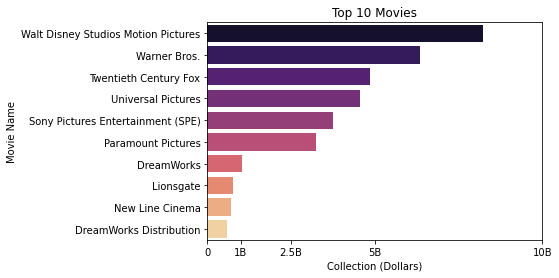

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='World Sales',y='Distributor',data = sorted_sales_by_dist.head(10),palette='magma')
plt.ylabel('Movie Name')
plt.xlabel('Collection (Dollars)')
plt.title('Top 10 Movies')
plt.xticks([0,10000000000,25000000000,50000000000,100000000000], ['0','1B','2.5B','5B','10B'])
plt.show()

['Action', 'Adventure', 'SciFi', 'Action', 'Adventure', 'Drama', 'SciFi', 'Action', 'Adventure', 'Fantasy']


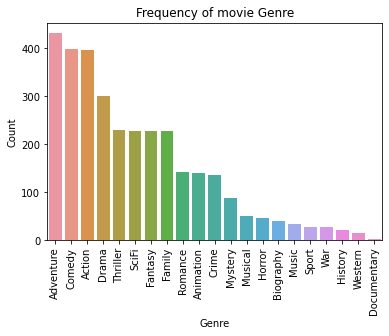

In [15]:
List = []
def sep_values(val):
  x = str()
  b1 = True
  for i in val:
    if i.isalpha():
      x += i
    elif i == "'" and b1 == True:
      b1 = False
    elif i == "'" and b1 == False:
      b1 = True
      List.append(x)
      x = str()



movies['Genre'].apply(sep_values)
print(List[:10])
from collections import Counter
Freq = Counter(List)

GenreFreq = pd.DataFrame(list(Freq.items()),columns = ['Genre','Count'])
GenreFreq.sort_values(by='Count', ascending = False,inplace = True)
sns.barplot(x=GenreFreq['Genre'],y=GenreFreq['Count'],data = GenreFreq)
plt.xticks(rotation=90)
plt.title('Frequency of movie Genre')
plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 918 entries, 2015-12-16 to 2011-07-06
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Title                       918 non-null    object
 1   Movie Info                  918 non-null    object
 2   Distributor                 918 non-null    object
 3   Domestic Sales (in $)       918 non-null    int64 
 4   International Sales (in $)  918 non-null    int64 
 5   World Sales (in $)          918 non-null    int64 
 6   Genre                       918 non-null    object
 7   Movie Runtime               918 non-null    object
 8   License                     744 non-null    object
dtypes: int64(3), object(6)
memory usage: 71.7+ KB
None


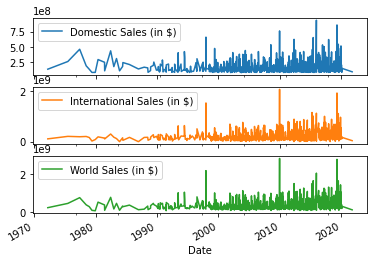

In [23]:
# Convert the date column to datetime64
movies.Date = pd.to_datetime(movies.Date)

# Set date column as index
movies.set_index('Date', inplace=True)

# Inspect data 
print(movies.info())

# Plot data
movies.plot(subplots=True)
plt.show()

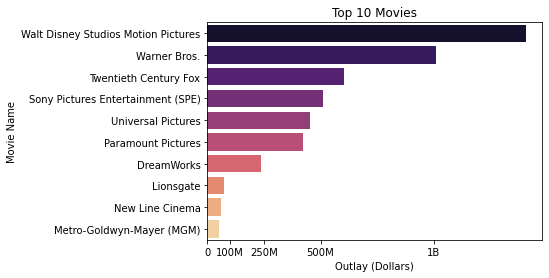

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='Budget',y='Distributor',data = sorted_budget_by_dist.head(10),palette='magma')
plt.ylabel('Movie Name')
plt.xlabel('Outlay (Dollars)')
plt.title('Top 10 Movies')
plt.xticks([0,1000000000,2500000000,5000000000,10000000000], ['0','100M','250M','500M','1B'])
plt.show()

In [23]:
movie_info['Profit']=movie_info['World Sales'] - movie_info['Cost']
print(movie_info.head)

<bound method NDFrame.head of      rank Release Date                                              Title  \
0       1   2019-04-23                                  Avengers: Endgame   
1       2   2011-05-20        Pirates of the Caribbean: On Stranger Tides   
2       3   2015-04-22                            Avengers: Age of Ultron   
3       5   2018-04-25                             Avengers: Infinity War   
4       7   2017-11-13                                     Justice League   
..    ...          ...                                                ...   
308   490   2015-01-29                       Kingsman: The Secret Service   
309   491   2001-12-19  The Lord of the Rings: The Fellowship of the Ring   
310   492   2001-07-18                                  Jurassic Park III   
311   493   2011-08-05                     Rise of the Planet of the Apes   
312   495   2004-10-22                                    The Incredibles   

                                             

In [49]:
profit_by_dist = movie_info.groupby("Distributor",as_index=False)["Profit"].sum()
print(profit_by_dist)

                            Distributor       Profit
0                     Columbia Pictures    152578797
1                            DreamWorks   6886754494
2               DreamWorks Distribution    362380802
3                             Lionsgate   2288028316
4             Metro-Goldwyn-Mayer (MGM)   1037016191
5                               Miramax    103719942
6                       New Line Cinema   2865279116
7                    Paramount Pictures   9966828673
8                    Revolution Studios     77989651
9     Sony Pictures Entertainment (SPE)  13765482385
10                The Weinstein Company    326074373
11                     TriStar Pictures    587021854
12                Twentieth Century Fox  17057281275
13                   Universal Pictures  11251200159
14  Walt Disney Studios Motion Pictures  43124945475
15                         Warner Bros.  23804145787


In [28]:
movie_info['%'] = ((movie_info['Profit'] / movie_info['Cost'].sum())*100).round(2).astype(str) + '%'
print(movie_info.head)

<bound method NDFrame.head of      rank Release Date                                              Title  \
0       1   2019-04-23                                  Avengers: Endgame   
1       2   2011-05-20        Pirates of the Caribbean: On Stranger Tides   
2       3   2015-04-22                            Avengers: Age of Ultron   
3       5   2018-04-25                             Avengers: Infinity War   
4       7   2017-11-13                                     Justice League   
..    ...          ...                                                ...   
308   490   2015-01-29                       Kingsman: The Secret Service   
309   491   2001-12-19  The Lord of the Rings: The Fellowship of the Ring   
310   492   2001-07-18                                  Jurassic Park III   
311   493   2011-08-05                     Rise of the Planet of the Apes   
312   495   2004-10-22                                    The Incredibles   

                                             

In [38]:
movie_info['%'] = movie_info['Profit'] / movie_info['Cost'] * 100
print(movie_info.head())

   rank Release Date                                        Title  \
0     1   2019-04-23                            Avengers: Endgame   
1     2   2011-05-20  Pirates of the Caribbean: On Stranger Tides   
2     3   2015-04-22                      Avengers: Age of Ultron   
3     5   2018-04-25                       Avengers: Infinity War   
4     7   2017-11-13                               Justice League   

                                                 url       Cost  \
0         /movie/Avengers-Endgame-(2019)#tab=summary  400000000   
1  /movie/Pirates-of-the-Caribbean-On-Stranger-Ti...  379000000   
2          /movie/Avengers-Age-of-Ultron#tab=summary  365000000   
3           /movie/Avengers-Infinity-War#tab=summary  300000000   
4           /movie/Justice-League-(2017)#tab=summary  300000000   

   domestic_gross  worldwide_gross  opening_weekend   mpaa      genre  ...  \
0       858373000       2797800564      357115007.0  PG-13     Action  ...   
1       241071802       10

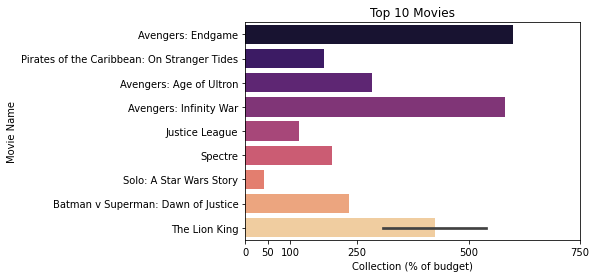

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='%',y='Title',data = movie_info.iloc[:10],palette='magma')
plt.ylabel('Movie Name')
plt.xlabel('Collection (% of budget)')
plt.title('Top 10 Movies')
plt.xticks([0,50,100,250,500,750], ['0','50','100','250','500','750'])
plt.show()

In [50]:
profit_by_perc = movie_info.groupby("Title",as_index=False)["%"].sum()
sorted_profit_by_perc=profit_by_perc.sort_values("%",ascending=False)
print(sorted_profit_by_perc)

                                             Title            %
248  The Lord of the Rings: The Return of the King  1119.181821
13                                          Avatar  1101.369706
270                                        Titanic  1000.823632
249          The Lord of the Rings: The Two Towers   907.973505
70                                    Finding Nemo   900.375154
..                                             ...          ...
246                                The Lone Ranger    15.778718
113                                  Jungle Cruise    10.444723
217                                   The Campaign    10.429206
85                                   Green Lantern     9.925586
62                                   Evan Almighty    -0.319586

[304 rows x 2 columns]


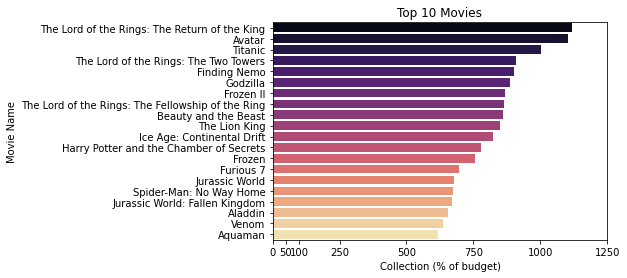

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(x='%',y='Title',data = sorted_profit_by_perc.head(20),palette='magma')
plt.ylabel('Movie Name')
plt.xlabel('Collection (% of budget)')
plt.title('Top 10 Movies')
plt.xticks([0,50,100,250,500,750,1000,1250], ['0','50','100','250','500','750','1000','1250'])
plt.show()